In [36]:
#import necessary libraries
import os
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import string

In [37]:
# set option to display all columns in data frame
pd.options.display.max_columns = None

In [38]:
# reading in the csv file
customer_base =pd.read_csv('cube v2.csv')
customer_base=pd.DataFrame(customer_base)
customer_base.shape

(497664, 23)

In [39]:
customer_base.head(10)

,Market,Proposition,Primary,Tenure,Age,International,CA,Card,Insurance,Investment,Mortgage,NPS,Digital,Numcust,TRB,Revenue,Primary_cust,Digital_cust,CA_holders,Card_holders,Ins_holders,Inv_holders,Mort_holders
0,AUH,3. Bronze,1. Primary,2. 1 - 3 years,2. 25 - 35,2. Domestic,N,N,Y,N,N,1. Promoter,1. Digitally active,10,90000,1500,10,10,0,0,10,0,0
1,AUH,3. Bronze,1. Primary,2. 1 - 3 years,2. 25 - 35,2. Domestic,N,N,Y,N,N,2. Passive,1. Digitally active,10,90000,1500,10,10,0,0,10,0,0
2,AUH,3. Bronze,1. Primary,2. 1 - 3 years,2. 25 - 35,2. Domestic,N,N,Y,N,N,3. Detractor,1. Digitally active,8,72000,1200,8,8,0,0,8,0,0
3,AUH,3. Bronze,1. Primary,2. 1 - 3 years,2. 25 - 35,2. Domestic,N,N,Y,N,Y,1. Promoter,1. Digitally active,8,72000,1200,8,8,0,0,8,0,8
4,AUH,3. Bronze,1. Primary,2. 1 - 3 years,2. 25 - 35,2. Domestic,N,N,Y,N,Y,2. Passive,1. Digitally active,10,90000,1500,10,10,0,0,10,0,10
5,AUH,3. Bronze,1. Primary,2. 1 - 3 years,2. 25 - 35,2. Domestic,N,N,Y,N,Y,3. Detractor,1. Digitally active,10,90000,1500,10,10,0,0,10,0,10
6,AUH,3. Bronze,1. Primary,2. 1 - 3 years,2. 25 - 35,2. Domestic,N,N,Y,Y,N,1. Promoter,1. Digitally active,8,72000,1200,8,8,0,0,8,8,0
7,AUH,3. Bronze,1. Primary,2. 1 - 3 years,2. 25 - 35,2. Domestic,N,N,Y,Y,N,2. Passive,1. Digitally active,8,72000,1200,8,8,0,0,8,8,0
8,AUH,3. Bronze,1. Primary,2. 1 - 3 years,2. 25 - 35,2. Domestic,N,N,Y,Y,N,3. Detractor,1. Digitally active,10,90000,1500,10,10,0,0,10,10,0
9,AUH,3. Bronze,1. Primary,2. 1 - 3 years,2. 25 - 35,2. Domestic,N,N,Y,Y,Y,1. Promoter,1. Digitally active,8,72000,1200,8,8,0,0,8,8,8


 ### Data Exploration

In [40]:
customer_base.shape # dimensions of data frame
customer_base.dtypes # column data types
# check for missing values
customer_base.isna().sum() # no NAs and no Nulls
customer_base.describe()

,Numcust,TRB,Revenue,Primary_cust,Digital_cust,CA_holders,Card_holders,Ins_holders,Inv_holders,Mort_holders
count,497664.000000,4.976640e+05,497664.000000,497664.000000,497664.000000,497664.000000,497664.000000,497664.000000,497664.000000,497664.000000
mean,66.845426,1.707924e+06,29843.932533,33.584635,40.787849,51.104235,41.274289,15.741774,23.869462,36.543889
std,186.911965,4.052358e+06,72644.681121,136.236448,155.250949,188.606326,175.075494,31.188959,74.289416,145.478906
min,2.000000,1.500000e+03,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,8.000000e+04,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.000000,3.088000e+05,6600.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000
75%,56.000000,1.290000e+06,24500.000000,20.000000,32.000000,28.000000,20.000000,13.000000,20.000000,20.000000
max,3264.000000,6.299520e+07,897600.000000,3264.000000,3264.000000,3264.000000,3264.000000,224.000000,1240.000000,3264.000000


In [41]:
customer_base['Market'].value_counts(ascending=False)
# customer_base['Proposition'].value_counts(ascending=False)

AUH    55296
CAN    55296
HK     55296
MX     55296
MYH    55296
SGH    55296
UAE    55296
UK     55296
US     55296
Name: Market, dtype: int64

### Data Cleaning

In [42]:
# transforming proposition into numerical format
customer_base['Proposition'] = customer_base['Proposition'].str.replace(r'2. Silver',"2" )
customer_base['Proposition'] = customer_base['Proposition'].str.replace(r'1. Gold',"3" )
customer_base['Proposition'] = customer_base['Proposition'].str.replace(r'3. Bronze',"1" )

<ipython-input-42-2c70137d9e3d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  customer_base['Proposition'] = customer_base['Proposition'].str.replace(r'2. Silver',"2" )
<ipython-input-42-2c70137d9e3d>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  customer_base['Proposition'] = customer_base['Proposition'].str.replace(r'1. Gold',"3" )
<ipython-input-42-2c70137d9e3d>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  customer_base['Proposition'] = customer_base['Proposition'].str.replace(r'3. Bronze',"1" )


In [43]:
# transforming primary into binary format
customer_base['Primary'] = customer_base['Primary'].str.replace(r'1. Primary','1' )
customer_base['Primary'] = customer_base['Primary'].str.replace(r'2. Non primary','0' )

<ipython-input-43-1dde8f8212cd>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  customer_base['Primary'] = customer_base['Primary'].str.replace(r'1. Primary','1' )
<ipython-input-43-1dde8f8212cd>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  customer_base['Primary'] = customer_base['Primary'].str.replace(r'2. Non primary','0' )


In [44]:
# exploring Tenure variable
customer_base['Tenure'].value_counts(ascending=False)

2. 1 - 3 years     124416
1. <1 year         124416
4. >5 years        124416
3.  4 - 5 years    124416
Name: Tenure, dtype: int64

In [45]:
# transforming tenure into numeric format
customer_base['Tenure'] = customer_base['Tenure'].str.replace(r'3.  4 - 5 years','3' )
customer_base['Tenure'] = customer_base['Tenure'].str.replace(r'4. >5 years','4' )
customer_base['Tenure'] = customer_base['Tenure'].str.replace(r'1. <1 year','1' )
customer_base['Tenure'] = customer_base['Tenure'].str.replace(r'2. 1 - 3 years','2' )


<ipython-input-45-b1942ecfd8fa>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  customer_base['Tenure'] = customer_base['Tenure'].str.replace(r'3.  4 - 5 years','3' )
<ipython-input-45-b1942ecfd8fa>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  customer_base['Tenure'] = customer_base['Tenure'].str.replace(r'4. >5 years','4' )
<ipython-input-45-b1942ecfd8fa>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  customer_base['Tenure'] = customer_base['Tenure'].str.replace(r'1. <1 year','1' )
<ipython-input-45-b1942ecfd8fa>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  customer_base['Tenure'] = customer_base['Tenure'].str.replace(r'2. 1 - 3 years','2' )


In [46]:
# exploring age
customer_base['Age'].value_counts(ascending=False)

2. 25 - 35    82944
6. 65+        82944
5. 55 - 65    82944
4. 45 - 55    82944
3. 35-45      82944
1. 18 - 25    82944
Name: Age, dtype: int64

In [47]:
# transforming Age into numeric format
customer_base['Age'] = customer_base['Age'].str.replace(r'6. 65+','6' )
customer_base['Age'] = customer_base['Age'].str.replace(r'4. 45 - 55','4' )
customer_base['Age'] = customer_base['Age'].str.replace(r'5. 55 - 65','5' )
customer_base['Age'] = customer_base['Age'].str.replace(r'3. 35-45','3' )
customer_base['Age'] = customer_base['Age'].str.replace(r'2. 25 - 35','2' )
customer_base['Age'] = customer_base['Age'].str.replace(r'1. 18 - 25','1' )

<ipython-input-47-b5fc74b1a4ad>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  customer_base['Age'] = customer_base['Age'].str.replace(r'6. 65+','6' )
<ipython-input-47-b5fc74b1a4ad>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  customer_base['Age'] = customer_base['Age'].str.replace(r'4. 45 - 55','4' )
<ipython-input-47-b5fc74b1a4ad>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  customer_base['Age'] = customer_base['Age'].str.replace(r'5. 55 - 65','5' )
<ipython-input-47-b5fc74b1a4ad>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  customer_base['Age'] = customer_base['Age'].str.replace(r'3. 35-45','3' )
<ipython-input-47-b5fc74b1a4ad>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  customer_base['Age'] = customer_base['Age'].str

In [48]:
# exploring international variable
customer_base['International'].value_counts(ascending=False)

2. Domestic         248832
1. International    248832
Name: International, dtype: int64

In [49]:
# transforming international variable into a numeric format
customer_base['International'] = customer_base['International'].str.replace(r'2. Domestic','0')
customer_base['International'] = customer_base['International'].str.replace(r'1. International','1')

<ipython-input-49-6332e86811cb>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  customer_base['International'] = customer_base['International'].str.replace(r'2. Domestic','0')
<ipython-input-49-6332e86811cb>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  customer_base['International'] = customer_base['International'].str.replace(r'1. International','1')


In [50]:
customer_base['CA'].value_counts(ascending=False)

N    248832
Y    248832
Name: CA, dtype: int64

In [51]:
customer_base['Card'].value_counts(ascending=False)

N    248832
Y    248832
Name: Card, dtype: int64

In [52]:
customer_base['Insurance'].value_counts(ascending=False)

Y    248832
N    248832
Name: Insurance, dtype: int64

In [53]:
customer_base['Investment'].value_counts(ascending=False)

N    248832
Y    248832
Name: Investment, dtype: int64

In [54]:
customer_base['NPS'].value_counts(ascending=False)

1. Promoter     165888
2. Passive      165888
3. Detractor    165888
Name: NPS, dtype: int64

In [55]:
# transforming NPS 
customer_base['NPS'] = customer_base['NPS'].str.replace(r'3. Detractor','1')
customer_base['NPS'] = customer_base['NPS'].str.replace(r'2. Passive','2')
customer_base['NPS'] = customer_base['NPS'].str.replace(r'1. Promoter','3')

<ipython-input-55-61dddf58122e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  customer_base['NPS'] = customer_base['NPS'].str.replace(r'3. Detractor','1')
<ipython-input-55-61dddf58122e>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  customer_base['NPS'] = customer_base['NPS'].str.replace(r'2. Passive','2')
<ipython-input-55-61dddf58122e>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  customer_base['NPS'] = customer_base['NPS'].str.replace(r'1. Promoter','3')


In [56]:
customer_base['Digital'].value_counts(ascending=False)

1. Digitally active        248832
2. Not digitally active    248832
Name: Digital, dtype: int64

In [57]:
# transforming digital into a binary variable
customer_base['Digital'] = customer_base['Digital'].str.replace(r'1. Digitally active','1')
customer_base['Digital'] = customer_base['Digital'].str.replace(r'2. Not digitally active','0')

<ipython-input-57-dba63ae449bc>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  customer_base['Digital'] = customer_base['Digital'].str.replace(r'1. Digitally active','1')
<ipython-input-57-dba63ae449bc>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  customer_base['Digital'] = customer_base['Digital'].str.replace(r'2. Not digitally active','0')


In [58]:
# total number of customer
total_customers=customer_base['Numcust'].sum()

In [59]:
# total revenue
customer_base['Revenue'].sum()

14852250840

In [60]:
# total number of primary customers
total_primary_customers=customer_base['Primary_cust'].sum()

In [61]:
#  primary customers total 
total_primary_customers

16713864

In [62]:
# total number of Digital customers/ total number of customers
customer_base['Digital_cust'].sum()

20298644

In [63]:
# total number of current account holders
customer_base['CA_holders'].sum()

25432738

In [64]:
# total number of card holders
customer_base['Card_holders'].sum()

20540728

In [65]:
# total number of insurance holders
customer_base['Ins_holders'].sum()

7834114

In [66]:
# total number of insurance holders
customer_base['Inv_holders'].sum()

11878972

In [67]:
# total number of mortgage holders
customer_base['Mort_holders'].sum()

18186578

In [68]:
customer_base.head(5)

,Market,Proposition,Primary,Tenure,Age,International,CA,Card,Insurance,Investment,Mortgage,NPS,Digital,Numcust,TRB,Revenue,Primary_cust,Digital_cust,CA_holders,Card_holders,Ins_holders,Inv_holders,Mort_holders
0,AUH,1,1,2,2,0,N,N,Y,N,N,3,1,10,90000,1500,10,10,0,0,10,0,0
1,AUH,1,1,2,2,0,N,N,Y,N,N,2,1,10,90000,1500,10,10,0,0,10,0,0
2,AUH,1,1,2,2,0,N,N,Y,N,N,1,1,8,72000,1200,8,8,0,0,8,0,0
3,AUH,1,1,2,2,0,N,N,Y,N,Y,3,1,8,72000,1200,8,8,0,0,8,0,8
4,AUH,1,1,2,2,0,N,N,Y,N,Y,2,1,10,90000,1500,10,10,0,0,10,0,10


In [69]:
# replacing binary values with 0 and 1
customer_base['CA'] = customer_base['CA'].str.replace(r'Y','1' )
customer_base['CA'] = customer_base['CA'].str.replace(r'N','0' )
customer_base['Card'] = customer_base['Card'].str.replace(r'Y','1' )
customer_base['Card'] = customer_base['Card'].str.replace(r'N','0' )
customer_base['Insurance'] = customer_base['Insurance'].str.replace(r'Y','1' )
customer_base['Insurance'] = customer_base['Insurance'].str.replace(r'N','0' )
customer_base['Investment'] = customer_base['Investment'].str.replace(r'Y','1' )
customer_base['Investment'] = customer_base['Investment'].str.replace(r'N','0' )
customer_base['Mortgage'] = customer_base['Mortgage'].str.replace(r'Y','1' )
customer_base['Mortgage'] = customer_base['Mortgage'].str.replace(r'N','0' )

In [70]:
# convert categorical variables with two unique values to binary variables
customer_base['Primary'] = customer_base['Primary'].str.replace(r'1. Primary','1' )
customer_base['Primary'] = customer_base['Primary'].str.replace(r'2. Primary','2' )

customer_base['International'] = customer_base['International'].str.replace(r'1. International','1' )
customer_base['International'] = customer_base['International'].str.replace(r'2. Domestic','2' )


<ipython-input-70-39830f8ef3e6>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  customer_base['Primary'] = customer_base['Primary'].str.replace(r'1. Primary','1' )
<ipython-input-70-39830f8ef3e6>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  customer_base['Primary'] = customer_base['Primary'].str.replace(r'2. Primary','2' )
<ipython-input-70-39830f8ef3e6>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  customer_base['International'] = customer_base['International'].str.replace(r'1. International','1' )
<ipython-input-70-39830f8ef3e6>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  customer_base['International'] = customer_base['International'].str.replace(r'2. Domestic','2' )


In [103]:
customer_base_nonnumeric= customer_base[["Primary",'International','CA','Card','Insurance','Investment',
                                      'Mortgage','Digital', 'Proposition','Tenure','Age','NPS']]

In [104]:
customer_base_nonnumeric

,Primary,International,CA,Card,Insurance,Investment,Mortgage,Digital,Proposition,Tenure,Age,NPS
0,1,0,0,0,1,0,0,1,1,2,2,3
1,1,0,0,0,1,0,0,1,1,2,2,2
2,1,0,0,0,1,0,0,1,1,2,2,1
3,1,0,0,0,1,0,1,1,1,2,2,3
4,1,0,0,0,1,0,1,1,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
497659,0,1,1,1,0,1,0,0,3,3,1,2
497660,0,1,1,1,0,1,0,0,3,3,1,1
497661,0,1,1,1,0,1,1,0,3,3,1,3
497662,0,1,1,1,0,1,1,0,3,3,1,2


In [108]:
customer_base.head()

,Market,Proposition,Primary,Tenure,Age,International,CA,Card,Insurance,Investment,Mortgage,NPS,Digital,Numcust,TRB,Revenue,Primary_cust,Digital_cust,CA_holders,Card_holders,Ins_holders,Inv_holders,Mort_holders
0,AUH,1,1,2,2,0,0,0,1,0,0,3,1,10,90000,1500,10,10,0,0,10,0,0
1,AUH,1,1,2,2,0,0,0,1,0,0,2,1,10,90000,1500,10,10,0,0,10,0,0
2,AUH,1,1,2,2,0,0,0,1,0,0,1,1,8,72000,1200,8,8,0,0,8,0,0
3,AUH,1,1,2,2,0,0,0,1,0,1,3,1,8,72000,1200,8,8,0,0,8,0,8
4,AUH,1,1,2,2,0,0,0,1,0,1,2,1,10,90000,1500,10,10,0,0,10,0,10


## customer_base is now all market numerically transformed data before standardisation

In [107]:
customer_base.rename(columns = {'Market_MYH':'Market_MYS'}, inplace = True)

## UK DATA

In [74]:
# CLV DATA
UK = customer_base[customer_base.Market == 'UK']

In [75]:
UK.describe()

,Numcust,TRB,Revenue,Primary_cust,Digital_cust,CA_holders,Card_holders,Ins_holders,Inv_holders,Mort_holders
count,55296.000000,5.529600e+04,55296.000000,55296.000000,55296.000000,55296.000000,55296.000000,55296.000000,55296.000000,55296.000000
mean,170.515589,3.184324e+06,52435.105613,85.745081,95.246311,135.503291,103.980577,35.013383,61.118164,95.285735
std,325.685888,5.288858e+06,71371.481636,245.238947,249.018097,337.765715,304.683849,38.405273,151.043928,269.127518
min,10.000000,1.500000e+04,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,5.400000e+05,6000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,80.000000,1.000000e+06,21000.000000,10.000000,30.000000,5.000000,5.000000,20.000000,5.000000,10.000000
75%,100.000000,3.000000e+06,80000.000000,80.000000,100.000000,80.000000,80.000000,65.000000,80.000000,80.000000
max,2040.000000,3.100000e+07,434000.000000,2040.000000,2040.000000,2040.000000,2040.000000,100.000000,1240.000000,2040.000000


In [77]:
# drop market column because now all data belongs to UK either way
UK= UK.drop(["Market"],1)

<ipython-input-77-047bfde33b41>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  UK= UK.drop(["Market"],1)


In [79]:
UK.shape

(55296, 22)

In [80]:
UK.head()

,Proposition,Primary,Tenure,Age,International,CA,Card,Insurance,Investment,Mortgage,NPS,Digital,Numcust,TRB,Revenue,Primary_cust,Digital_cust,CA_holders,Card_holders,Ins_holders,Inv_holders,Mort_holders
387072,1,1,2,2,0,0,0,1,0,0,3,1,80,720000,12000,80,80,0,0,80,0,0
387073,1,1,2,2,0,0,0,1,0,0,2,1,100,900000,15000,100,100,0,0,100,0,0
387074,1,1,2,2,0,0,0,1,0,0,1,1,80,720000,12000,80,80,0,0,80,0,0
387075,1,1,2,2,0,0,0,1,0,1,3,1,80,720000,12000,80,80,0,0,80,0,80
387076,1,1,2,2,0,0,0,1,0,1,2,1,80,720000,12000,80,80,0,0,80,0,80


In [83]:
# change transfomed variables into numeric data type
UK['International']=UK['International'].astype(int)
UK['Digital']=UK['Digital'].astype(int)
UK['CA']=UK['CA'].astype(int)
UK['Card']=UK['Card'].astype(int)
UK['Insurance']=UK['Insurance'].astype(int)
UK['Investment']=UK['Investment'].astype(int)
UK['Mortgage']=UK['Mortgage'].astype(int)
UK['Tenure']=UK['Tenure'].astype(int)
UK['Primary']=UK['Primary'].astype(int)
UK['Proposition']=UK['Proposition'].astype(int)
UK['NPS']=UK['NPS'].astype(int)

In [84]:
UK.dtypes

Proposition       int64
Primary           int64
Tenure            int64
Age              object
International     int64
CA                int64
Card              int64
Insurance         int64
Investment        int64
Mortgage          int64
NPS               int64
Digital           int64
Numcust           int64
TRB               int64
Revenue           int64
Primary_cust      int64
Digital_cust      int64
CA_holders        int64
Card_holders      int64
Ins_holders       int64
Inv_holders       int64
Mort_holders      int64
dtype: object

In [86]:
# creating composite variable for CLV data
UK['Involvement']= UK['International']+UK['Primary']+UK['CA']+UK['Card']+UK['Insurance']+UK['Investment']+UK['Mortgage']+UK['Digital']

In [87]:
UK.head()

,Proposition,Primary,Tenure,Age,International,CA,Card,Insurance,Investment,Mortgage,NPS,Digital,Numcust,TRB,Revenue,Primary_cust,Digital_cust,CA_holders,Card_holders,Ins_holders,Inv_holders,Mort_holders,Involvement
387072,1,1,2,2,0,0,0,1,0,0,3,1,80,720000,12000,80,80,0,0,80,0,0,3
387073,1,1,2,2,0,0,0,1,0,0,2,1,100,900000,15000,100,100,0,0,100,0,0,3
387074,1,1,2,2,0,0,0,1,0,0,1,1,80,720000,12000,80,80,0,0,80,0,0,3
387075,1,1,2,2,0,0,0,1,0,1,3,1,80,720000,12000,80,80,0,0,80,0,80,4
387076,1,1,2,2,0,0,0,1,0,1,2,1,80,720000,12000,80,80,0,0,80,0,80,4


## CLV data

In [18]:
UK.to_csv(r'/Users/farahenani/Desktop/Dissertation/customer_retail_bank/CLV_data_all.csv', index = False)

### Pipeline to standardise numeric variables


In [88]:
customer_base_num= UK[['Numcust',"TRB",'Primary_cust','Digital_cust','CA_holders','Card_holders',
                                      'Ins_holders','Inv_holders','Mort_holders','Revenue']]

In [89]:
customer_base_num.head()

,Numcust,TRB,Primary_cust,Digital_cust,CA_holders,Card_holders,Ins_holders,Inv_holders,Mort_holders,Revenue
387072,80,720000,80,80,0,0,80,0,0,12000
387073,100,900000,100,100,0,0,100,0,0,15000
387074,80,720000,80,80,0,0,80,0,0,12000
387075,80,720000,80,80,0,0,80,0,80,12000
387076,80,720000,80,80,0,0,80,0,80,12000


In [90]:
num_attribs= list(customer_base_num)

In [91]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator

In [92]:
class DataFrameSelector(BaseEstimator):
    
    def __init__(self, attribute_names):
        self.attribute_names= attribute_names
        
    def fit(self,X, y = None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values



In [93]:
# numerical pipeline 
num_pipeline= Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('std_scaler',StandardScaler())
])

#### Numerical Data

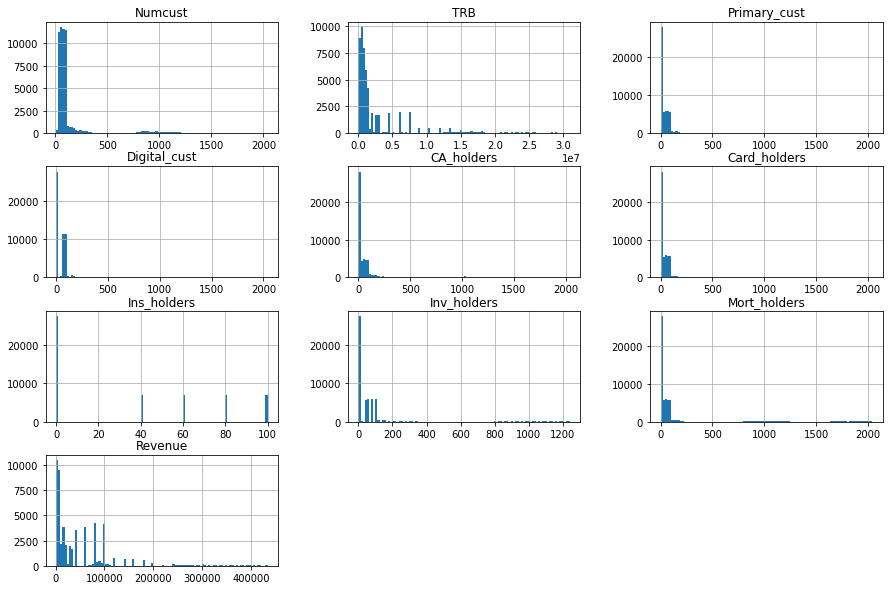

In [94]:
# Plotting Histograms for all numerical  variables
customer_base_num.hist(bins=100,figsize=(15,10));

In [96]:
customer_base_numerical= num_pipeline.fit_transform(customer_base_num)

In [97]:
num_data = pd.DataFrame(customer_base_numerical,columns=customer_base_num.columns)

### Concatenating the  dataframes

In [112]:

frames = [ num_data, customer_base_nonnumeric]

customer_base_prepared = pd.concat(frames,axis=1)

In [109]:
type(customer_base_prepared)

pandas.core.frame.DataFrame

In [114]:
customer_base_prepared.head()

,Numcust,TRB,Primary_cust,Digital_cust,CA_holders,Card_holders,Ins_holders,Inv_holders,Mort_holders,Revenue,Primary,International,CA,Card,Insurance,Investment,Mortgage,Digital,Proposition,Tenure,Age,NPS
0,-0.277925,-0.465950,-0.023427,-0.061226,-0.401179,-0.341277,1.171376,-0.404642,-0.354057,-0.566549,1,0,0,0,1,0,0,1,1,2,2,3
1,-0.216516,-0.431916,0.058127,0.019090,-0.401179,-0.341277,1.692143,-0.404642,-0.354057,-0.524515,1,0,0,0,1,0,0,1,1,2,2,2
2,-0.277925,-0.465950,-0.023427,-0.061226,-0.401179,-0.341277,1.171376,-0.404642,-0.354057,-0.566549,1,0,0,0,1,0,0,1,1,2,2,1
3,-0.277925,-0.465950,-0.023427,-0.061226,-0.401179,-0.341277,1.171376,-0.404642,-0.056798,-0.566549,1,0,0,0,1,0,1,1,1,2,2,3
4,-0.277925,-0.465950,-0.023427,-0.061226,-0.401179,-0.341277,1.171376,-0.404642,-0.056798,-0.566549,1,0,0,0,1,0,1,1,1,2,2,2


In [115]:
customer_base_prepared['CA'] = customer_base_prepared['CA'].astype(float, errors = 'raise')
customer_base_prepared['Primary'] = customer_base_prepared['Primary'].astype(float, errors = 'raise')
customer_base_prepared['Insurance'] = customer_base_prepared['Insurance'].astype(float, errors = 'raise')
customer_base_prepared['International'] = customer_base_prepared['International'].astype(float, errors = 'raise')
customer_base_prepared['Investment'] = customer_base_prepared['Investment'].astype(float, errors = 'raise')
customer_base_prepared['Mortgage'] = customer_base_prepared['Mortgage'].astype(float, errors = 'raise')
customer_base_prepared['Digital'] = customer_base_prepared['Digital'].astype(float, errors = 'raise')
customer_base_prepared['Proposition'] = customer_base_prepared['Proposition'].astype(float, errors = 'raise')

customer_base_prepared['Tenure'] = customer_base_prepared['Tenure'].astype(float, errors = 'raise')


In [116]:

customer_base_prepared['Card'] = customer_base_prepared['Card'].astype(float, errors = 'raise')
customer_base_prepared['NPS'] = customer_base_prepared['NPS'].astype(float, errors = 'raise')



In [117]:
customer_base_prepared['Age'] = customer_base_prepared['Age'].str.replace('+', '')

<ipython-input-117-33880ca43467>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  customer_base_prepared['Age'] = customer_base_prepared['Age'].str.replace('+', '')


In [118]:
customer_base_prepared['Age'] = customer_base_prepared['Age'].astype(float, errors = 'raise')

In [119]:
customer_base_prepared['Age'].value_counts()

2.0    82944
6.0    82944
5.0    82944
4.0    82944
3.0    82944
1.0    82944
Name: Age, dtype: int64

### Download Dataframe numerically transformed and standardised data, used in Factor Analysis

In [90]:
customer_base_prepared.to_csv(r'/Users/farahenani/Desktop/Dissertation/customer_retail_bank/FINAL_data.csv', index = False)

## Correlation Matrix


In [7]:
customer_base_num.shape

(497664, 10)

In [87]:
# correlation for all markets data
corr = customer_base_num.corr()
corr.style.background_gradient(cmap='coolwarm')

,Numcust,TRB,Revenue,Primary_cust,Digital_cust,CA_holders,Card_holders,Ins_holders,Inv_holders,Mort_holders
Numcust,1.000000,0.696327,0.552513,0.685013,0.793984,0.986246,0.904421,0.028868,0.323580,0.737605
TRB,0.696327,1.000000,0.912772,0.605506,0.629385,0.650370,0.554856,0.240366,0.391307,0.533631
Revenue,0.552513,0.912772,1.000000,0.497845,0.518595,0.498918,0.451248,0.294074,0.284089,0.404558
Primary_cust,0.685013,0.605506,0.497845,1.000000,0.544445,0.675675,0.619595,0.019249,0.224373,0.504439
Digital_cust,0.793984,0.629385,0.518595,0.544445,1.000000,0.772816,0.735497,0.084926,0.228539,0.567697
CA_holders,0.986246,0.650370,0.498918,0.675675,0.772816,1.000000,0.897481,-0.033136,0.302416,0.729696
Card_holders,0.904421,0.554856,0.451248,0.619595,0.735497,0.897481,1.000000,-0.007128,0.156878,0.624515
Ins_holders,0.028868,0.240366,0.294074,0.019249,0.084926,-0.033136,-0.007128,1.000000,0.110326,0.007844
Inv_holders,0.323580,0.391307,0.284089,0.224373,0.228539,0.302416,0.156878,0.110326,1.000000,0.392472
Mort_holders,0.737605,0.533631,0.404558,0.504439,0.567697,0.729696,0.624515,0.007844,0.392472,1.000000


In [84]:
import pandas as pd
data =pd.read_csv('UK_final_data.csv')

In [85]:
data.head()

,Numcust,TRB,Primary_cust,Digital_cust,CA_holders,Card_holders,Ins_holders,Inv_holders,Mort_holders,Revenue,Primary,International,CA,Card,Insurance,Investment,Mortgage,Digital,Proposition,Tenure,Age,NPS
0,0.070379,-0.243790,0.340697,0.252573,-0.270957,-0.235752,2.060290,-0.321304,-0.251197,-0.245633,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0,3.0
1,0.177381,-0.199371,0.487501,0.381397,-0.270957,-0.235752,2.701543,-0.321304,-0.251197,-0.204336,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0
2,0.070379,-0.243790,0.340697,0.252573,-0.270957,-0.235752,2.060290,-0.321304,-0.251197,-0.245633,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0
3,0.070379,-0.243790,0.340697,0.252573,-0.270957,-0.235752,2.060290,-0.321304,0.298711,-0.245633,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0,3.0
4,0.070379,-0.243790,0.340697,0.252573,-0.270957,-0.235752,2.060290,-0.321304,0.298711,-0.245633,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0


In [86]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Numcust,TRB,Primary_cust,Digital_cust,CA_holders,Card_holders,Ins_holders,Inv_holders,Mort_holders,Revenue,Primary,International,CA,Card,Insurance,Investment,Mortgage,Digital,Proposition,Tenure,Age,NPS
Numcust,1.000000,0.674391,0.661986,0.676198,0.993962,0.865794,-0.261392,0.327852,0.744557,0.626711,0.002992,0.000270,0.308555,0.114976,-0.308548,-0.148240,0.061581,0.061339,-0.117463,0.000335,-0.000410,-0.000372
TRB,0.674391,1.000000,0.717069,0.466729,0.678731,0.446007,-0.250004,0.453430,0.582095,0.862345,0.307608,-0.000136,0.304619,0.036767,-0.304510,-0.074988,0.078124,0.085316,0.220498,0.000597,-0.000868,-0.001158
Primary_cust,0.661986,0.717069,1.000000,0.449346,0.658265,0.573305,-0.175402,0.220248,0.492252,0.749243,0.349642,-0.000416,0.206882,0.077250,-0.206837,-0.096710,0.041098,0.041152,-0.074791,0.000445,-0.000076,-0.000898
Digital_cust,0.676198,0.466729,0.449346,1.000000,0.667317,0.581555,-0.134464,0.231481,0.501438,0.441102,0.002372,-0.000025,0.201884,0.075559,-0.201826,-0.097027,0.040279,0.382491,-0.076876,0.000350,-0.000275,-0.000338
CA_holders,0.993962,0.678731,0.658265,0.667317,1.000000,0.857082,-0.261534,0.331627,0.739811,0.631116,0.002892,0.000113,0.401179,0.110840,-0.297455,-0.142898,0.059490,0.029652,-0.113340,0.000182,-0.000411,-0.000517
Card_holders,0.865794,0.446007,0.573305,0.581555,0.857082,1.000000,-0.195748,0.146868,0.586437,0.460212,0.002327,-0.000100,0.226336,0.341277,-0.226341,-0.144764,0.029864,0.033088,-0.137406,0.000161,-0.000247,-0.000417
Ins_holders,-0.261392,-0.250004,-0.175402,-0.134464,-0.261534,-0.195748,1.000000,-0.135987,-0.192412,-0.235660,0.000198,0.000857,0.000537,0.000141,0.911690,0.000085,-0.000970,0.259733,0.000334,-0.000004,-0.000411,-0.000254
Inv_holders,0.327852,0.453430,0.220248,0.231481,0.331627,0.146868,-0.135987,1.000000,0.434739,0.338401,0.006026,0.000051,0.172929,-0.008239,-0.172809,0.404642,0.103559,0.065987,0.020566,-0.000311,-0.000380,-0.000603
Mort_holders,0.744557,0.582095,0.492252,0.501438,0.739811,0.586437,-0.192412,0.434739,1.000000,0.511515,0.002000,-0.000277,0.224100,0.066117,-0.224095,-0.068837,0.354057,0.037123,-0.070490,0.000101,-0.000644,-0.000711
Revenue,0.626711,0.862345,0.749243,0.441102,0.631116,0.460212,-0.235660,0.338401,0.511515,1.000000,0.208397,-0.000160,0.302695,0.044489,-0.302597,-0.090482,0.064157,0.123406,0.383832,-0.000340,-0.000414,-0.000919


In [5]:
#Compute VIF data for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = data.columns
vif["vif_Factor"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif

,features,vif_Factor
0,Numcust,12.725555
1,TRB,7.024630
2,Primary_cust,4.568791
3,Digital_cust,2.552275
4,Card_holders,7.062091
5,Ins_holders,11.745946
6,Inv_holders,2.108676
7,Mort_holders,3.345694
8,Revenue,8.390493
9,Primary,2.837084


In [ ]:
data=data.drop(['CA'],1)

In [ ]:
data=data.drop(['TRB'],1)

In [ ]:
data=data.drop(['CA_holders'],1)